In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
df=pd.read_csv("Social_Network_Ads.csv").iloc[:,2:]
df

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

# Expolatory Data Analysis

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

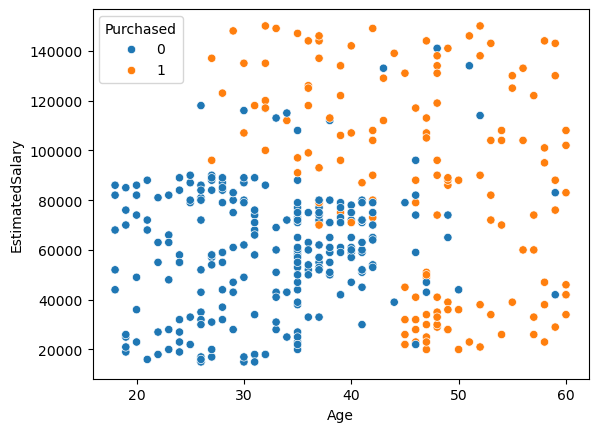

In [14]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],hue=df["Purchased"])

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test=train_test_split(df.drop("Purchased",axis=1),
                df["Purchased"],
                test_size=0.25,
                random_state=0)

# Scaling (Normalization)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Converting into DataFrame

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
print(len(X_train_scaled))
print(len(X_test_scaled))

300
100


# Model Training (Logistic Regression)

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

prediction=lr.predict(X_test)
scaled_prediction=lr_scaled.predict(X_test_scaled)

# Accuracy Score

In [29]:
from sklearn.metrics import accuracy_score
print("Actual: ",accuracy_score(Y_test,prediction))
print("Normalized: ",accuracy_score(Y_test,scaled_prediction))

Actual:  0.89
Normalized:  0.89
